# NN with L2 Regularization

## CS640

### U59844514 Xiankang Wu

### U37992938 Rongyu Wang

<p>      This code is about the implementation of a basic neural network with L2 regularization. Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting. To ensure we take into account the input variables, we penalize all the weights by making them small. This also makes the model simpler and less prone to overfitting.

<p>      ref1: https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization
<p>      ref2: https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2
<p>      <b>Check out our solution to Problem 5 at the end.</b>

In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.
from sklearn.model_selection import KFold    #k-fold cross-validation

In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    #Here we need to add a parameter hidden_dim
    def __init__(self, input_dim, output_dim, hidden_dim, L2_lambda, num_examples):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of nodes in the hidden layer
            L2_lambda: regularization term, which measures model complexity.
            num_examples: number of data entries in .csv
        """
        #initialize a(1) and a(2) with random matrix(input_dim * hidden_dim)
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        #initialize a(2) and a(3) with random matrix(hidden_dim * output_dim)
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
        self.L2_lambda = L2_lambda
        self.num_examples = num_examples

    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.

        args:
            X: Data array
            y: Labels corresponding to input data

        returns:
            cost: average cost per data sample
        """
        #num_examples = np.shape(X)[0]
        # Hyperbolic tangent funcition as our activation function
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        
        #axis = 1: sum over rows
        #We can see that 0≤softmax_scores≤1. the values of softmax_scores can be considered as probabilities.
        #https://math.stackexchange.com/questions/2471528/understanding-the-softmax-function
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        one_hot_y = np.zeros((self.num_examples,np.max(y)+1))
        logloss = np.zeros((self.num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        l2_regularization_cost = self.L2_lambda / 2 * (np.sum(np.square(self.theta1)) + np.sum(np.square(self.theta2)))
        return 1./self.num_examples * (data_loss + l2_regularization_cost)
    #--------------------------------------------------------------------------
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
    
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    # default learning rate = 0.01
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha):
        
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            
            # Forward propagation
            z1 = np.dot(X, self.theta1) + self.bias1
            a = np.tanh(z1)
            z2 = np.dot(a, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
            #softmax_scores = exp_z2 / (exp_z2 + 1)

            # Backpropagation
            beta1 = np.zeros_like(softmax_scores)
            beta2 = np.zeros_like(softmax_scores)
            
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
                
            beta2 = softmax_scores - one_hot_y
            # Compute gradients of model parameters. L2 regularization added
#           dtheta2 = 1./self.num_examples * (np.dot(a.T, beta2) + self.L2_lambda * self.theta2)
#           dbias2 = 1./self.num_examples * np.sum(beta2, axis = 0, keepdims=True)
            dtheta2 = np.dot(a.T, beta2) + self.L2_lambda * self.theta2
            dbias2 = np.sum(beta2, axis = 0, keepdims=True)

            
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a, 2))
#           dtheta1 = 1./self.num_examples * (np.dot(X.T, beta1) +  self.L2_lambda * self.theta1)                         
#           dbias1 = 1./self.num_examples * np.sum(beta1, axis = 0, keepdims=True)
            dtheta1 = np.dot(X.T, beta1) +  self.L2_lambda * self.theta1
            dbias1 = np.sum(beta1, axis = 0, keepdims=True)
        
            # Gradient descent parameter update
            # alpha is the learning rate
            self.theta2 -= alpha * dtheta2
            self.bias2  -= alpha * dbias2
            self.theta1 -= alpha * dtheta1
            self.bias1  -= alpha * dbias1
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    # Makes a prediction based on current model parameters.
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.05)
    plt.show()

In [4]:
def Confusion_matrix(X, y):
    acc = 0
    y_pred = logreg.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]: 
            acc += 1
    acc = acc*1.0/len(y_pred)
    
    return acc, con_mat

### Linear Data Training

In [5]:
#1. Load data
X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_linearY.csv', delimiter=',').astype(np.int64)

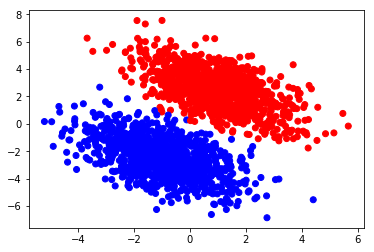

In [6]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [7]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 3
L2_lambda = 0.001
num_examples = np.shape(X)[0]
# hidden_dim added in the class initializer list. Indicating the number of hidden nodes
logreg = LogisticRegression(input_dim, output_dim, hidden_dim, L2_lambda, num_examples)

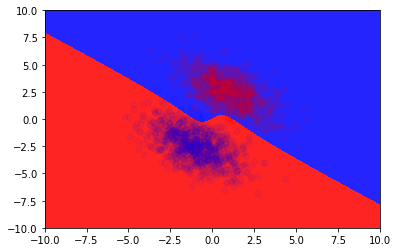

In [8]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

In [9]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

In [10]:
#6. 5-fold cross-validation and data analysis
kf = KFold(n_splits = 5)
i = 1
for train_index, test_index in kf.split(X,y):
    print ("The", i, "th corss-validation:")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
    print ("Confusion Matrix: \n", con_mat)
    print ("Accuracy:", acc)
    print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

The 1 th corss-validation:
Confusion Matrix: 
 [[202.   0.]
 [  1. 197.]]
Accuracy: 0.9975
Cost: 0.0009253795156285318 

The 2 th corss-validation:
Confusion Matrix: 
 [[198.   1.]
 [  0. 201.]]
Accuracy: 0.9975
Cost: 0.0016435796690404286 

The 3 th corss-validation:
Confusion Matrix: 
 [[205.   0.]
 [  0. 195.]]
Accuracy: 1.0
Cost: 0.0003629688781599557 

The 4 th corss-validation:
Confusion Matrix: 
 [[192.   0.]
 [  0. 208.]]
Accuracy: 1.0
Cost: 1.8659857040316237e-05 

The 5 th corss-validation:
Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.00011067563807115518 



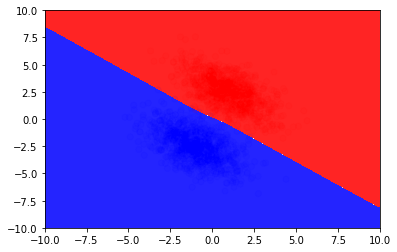

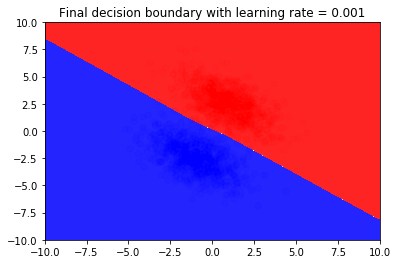

Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.00011067563807115518 



In [11]:
#7. Plot decision boundary after trainning
plt.title("Final decision boundary with learning rate = 0.001")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

### Non linear Data Training

In [12]:
#1. Load data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)

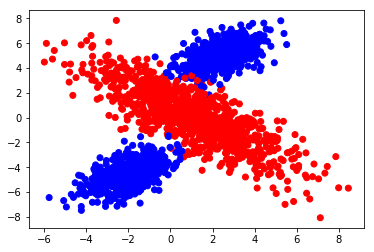

In [13]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [14]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 3
L2_lambda = 0.001
num_examples = np.shape(X)[0]
# hidden_dim added in the class initializer list
logreg = LogisticRegression(input_dim, output_dim, hidden_dim, L2_lambda, num_examples)

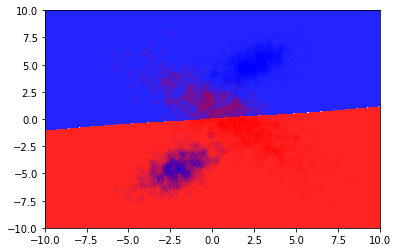

In [15]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

### Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [16]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

In [17]:
#6. 5-fold cross-validation and data analysis
kf = KFold(n_splits = 5)
i = 1
for train_index, test_index in kf.split(X,y):
    print ("The", i, "th corss-validation:")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
    print ("Confusion Matrix: \n", con_mat)
    print ("Accuracy:", acc)
    print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

The 1 th corss-validation:
Confusion Matrix: 
 [[195.   6.]
 [  4. 195.]]
Accuracy: 0.975
Cost: 0.011736614500732268 

The 2 th corss-validation:
Confusion Matrix: 
 [[186.   3.]
 [  3. 208.]]
Accuracy: 0.985
Cost: 0.012393068708621368 

The 3 th corss-validation:
Confusion Matrix: 
 [[196.   4.]
 [  3. 197.]]
Accuracy: 0.9825
Cost: 0.015658640275267127 

The 4 th corss-validation:
Confusion Matrix: 
 [[216.   5.]
 [  1. 178.]]
Accuracy: 0.985
Cost: 0.011670813609371103 

The 5 th corss-validation:
Confusion Matrix: 
 [[196.   5.]
 [  0. 199.]]
Accuracy: 0.9875
Cost: 0.0071309495768528 



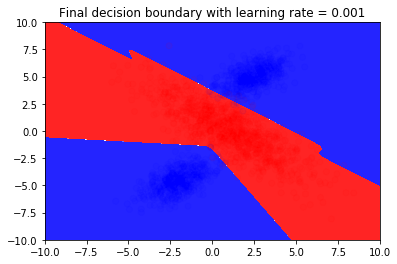

Confusion Matrix: 
 [[196.   5.]
 [  0. 199.]]
Accuracy: 0.9875
Cost: 0.0071309495768528 



In [19]:
#7. Plot decision boundary after trainning
plt.title("Final decision boundary with learning rate = 0.001")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

## Problem 5: Influence of L2 regularization before-and-after

<p> We implemented L2 regularization. After the analysis the accuracy of testing data, there was an slight decrease in cost and an slight increase in accuracyl. For example, from 0.1077 down to 0.0080 in cost and 0.9725 up to 0.09875 in accuracy. 
The result showed a slight improvement in performance. We think that the reason why we haven't seen a larger improvement is because the data set provided is not likely to cause much overfitting. L2 regularization is used mainly for penalizing complex models, so we believe that with more complex data(for example, with less than 0.9 accurac), we may observe a larger improvement in performance.